# Notebook 1 — Exploratory Data Analysis & Preprocessing
**Course:** AI/ML — T2 Project | **Student:** Aditya Goyal | **ID:** iitp_aiml_2506120
---
This notebook performs exploratory data analysis (EDA) on the German Credit dataset, visualizes key patterns, and applies preprocessing steps including imputation, feature engineering, encoding, and scaling to prepare the data for model training.

## 1.1 Setup & Environment
Mounts Google Drive, imports required libraries (Pandas, NumPy, Matplotlib, Seaborn), and initialises project directory paths.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Mount Google Drive (optional – falls back to local /content if unavailable)
try:
    from google.colab import drive
    drive.mount('/content/drive')
    project_path = '/content/drive/MyDrive/T2_Project_Aditya_Goyal'
    print("Drive mounted. Using Drive path.")
except Exception:
    project_path = '/content/T2_Project_Aditya_Goyal'
    print("Drive not available. Using local path:", project_path)

os.makedirs(f'{project_path}/Data', exist_ok=True)
os.makedirs(f'{project_path}/Visualizations', exist_ok=True)
os.makedirs(f'{project_path}/Models', exist_ok=True)
print("Environment ready. Project path:", project_path)

Mounted at /content/drive
Drive mounted. Using Drive path.
Environment ready. Project path: /content/drive/MyDrive/T2_Project_Aditya_Goyal


## 1.2 Dataset Creation & Exploration
Generates a synthetic German Credit dataset with 1,000 samples, then explores its structure, distributions, and key statistics.

In [ ]:
np.random.seed(42)
n_samples = 1000

import pandas as pd
import numpy as np


# Set random seed for reproducibility
np.random.seed(42)


# Generate synthetic credit data
n_samples = 1000


data = {
   'Age': np.random.randint(18, 75, n_samples),
   'Sex': np.random.choice(['male', 'female'], n_samples),
   'Job': np.random.choice([0, 1, 2, 3], n_samples, p=[0.2, 0.4, 0.3, 0.1]),
   'Housing': np.random.choice(['own', 'rent', 'free'], n_samples, p=[0.6, 0.3, 0.1]),
   'Saving accounts': np.random.choice(['little', 'moderate', 'quite rich', 'rich', np.nan],
                                      n_samples, p=[0.4, 0.3, 0.1, 0.1, 0.1]),
   'Checking account': np.random.choice(['little', 'moderate', 'rich', np.nan],
                                       n_samples, p=[0.5, 0.25, 0.15, 0.1]),
   'Credit amount': np.random.randint(250, 20000, n_samples),
   'Duration': np.random.randint(4, 72, n_samples),
   'Purpose': np.random.choice(['car', 'furniture', 'radio/TV', 'education', 'business',
                               'domestic appliances', 'repairs', 'vacation/others'],
                              n_samples, p=[0.3, 0.15, 0.2, 0.1, 0.1, 0.05, 0.05, 0.05])
}


# Create target based on business rules with some randomness
def generate_risk(row):
   risk_score = 0

   # Age factor
   if row['Age'] < 25:
       risk_score += 15
   elif row['Age'] > 60:
       risk_score += 10

   # Credit amount and duration factor
   if row['Credit amount'] > 10000:
       risk_score += 20
   if row['Duration'] > 36:
       risk_score += 15

   # Savings and checking
   if pd.isna(row['Saving accounts']) or row['Saving accounts'] == 'little':
       risk_score += 20
   if pd.isna(row['Checking account']) or row['Checking account'] == 'little':
       risk_score += 15

   # Job stability
   if row['Job'] == 0:
       risk_score += 25

   # Random noise
   risk_score += np.random.randint(-10, 10)

   # Threshold
   return 'bad' if risk_score > 50 else 'good'


df = pd.DataFrame(data)
df['Risk'] = df.apply(generate_risk, axis=1)


# Save to CSV
df.to_csv('german_credit_data.csv', index=False)
print(f"Dataset created: {len(df)} rows")
print(f"Risk distribution:\n{df['Risk'].value_counts()}")

# Audit
print(df.info())
print(df.describe())
print(f"Missing Values:\n{df.isnull().sum()}")

Dataset created: 1000 rows
Risk distribution:
Risk
good    656
bad     344
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB
None
               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     46.247000     1.306000    9943.912000    36.810000
std  

## 1.3 Exploratory Visualizations
Six plots covering target distribution, credit amount distribution, age vs. risk, correlation heatmap, credit purpose breakdown, and credit amount by housing and risk.

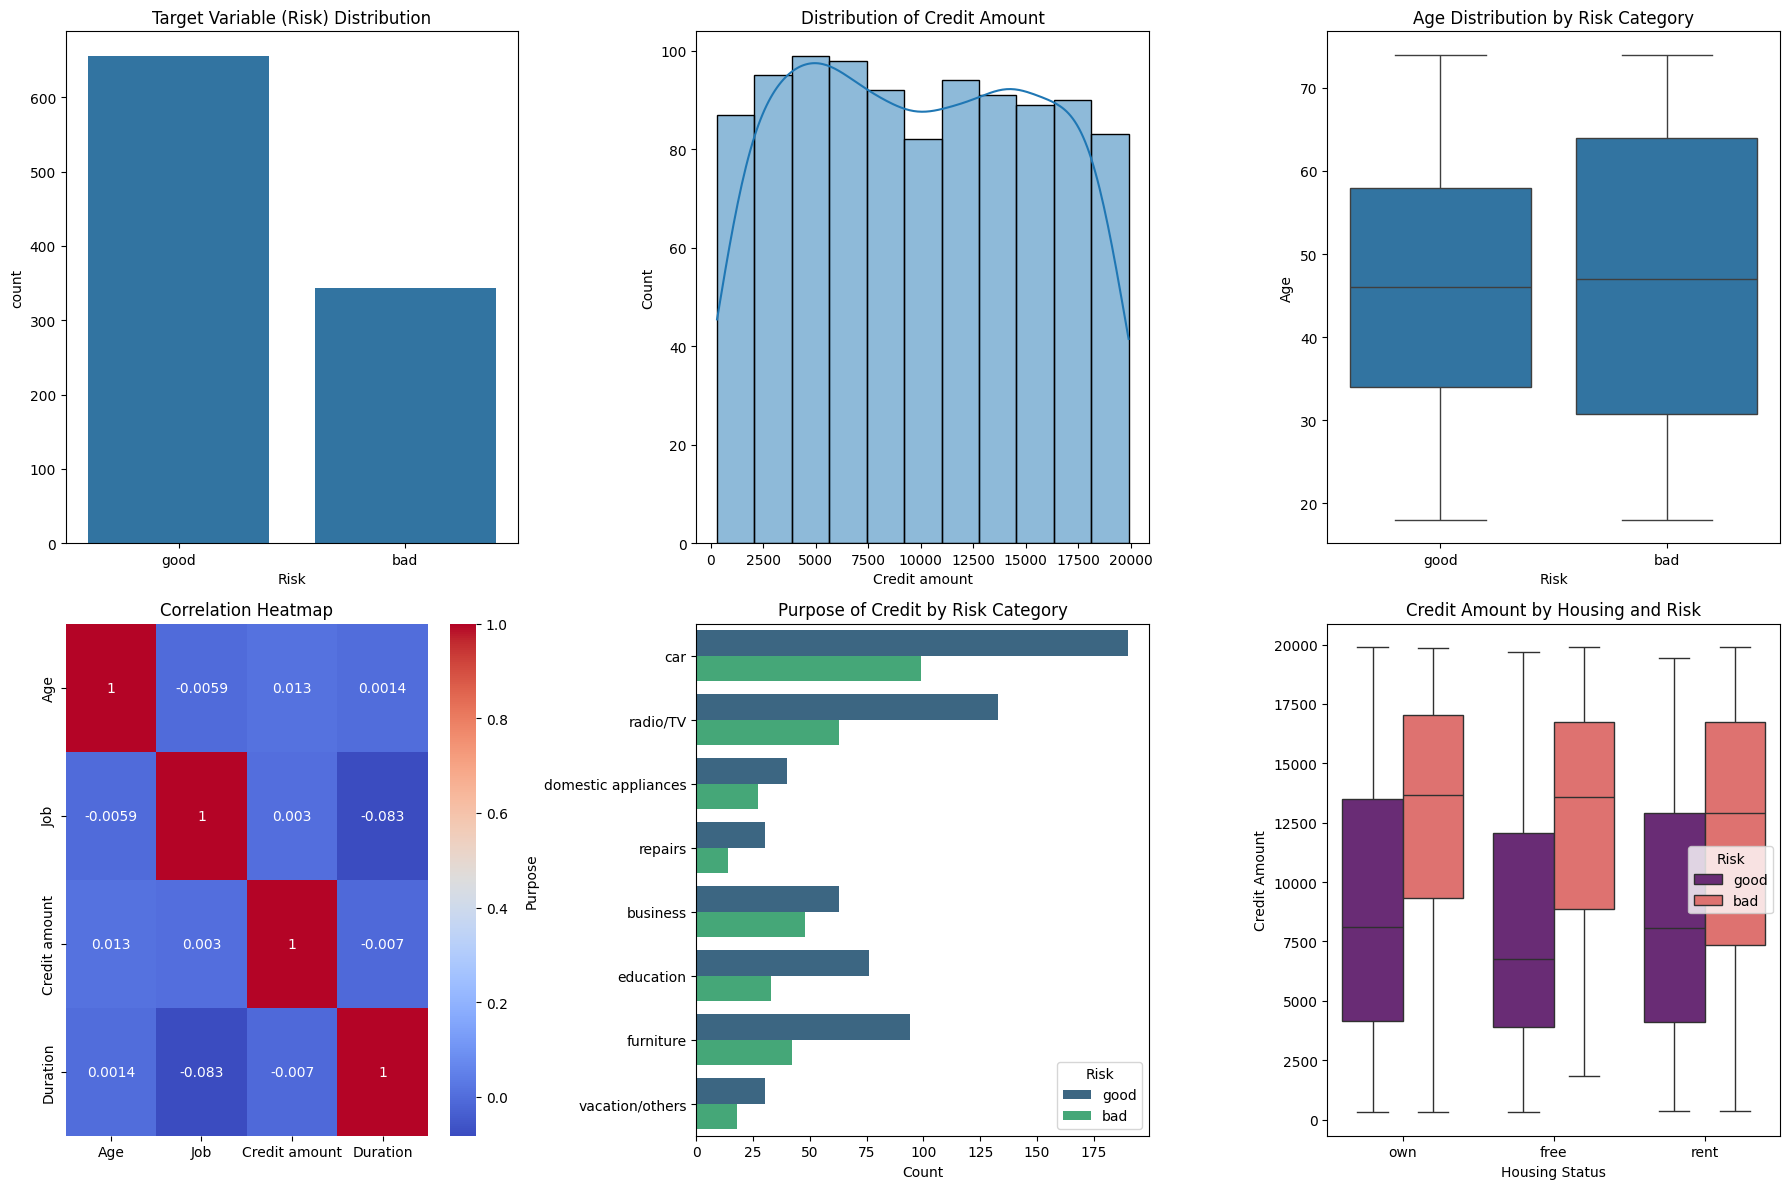

In [ ]:
#Visualizations
plt.figure(figsize=(18, 12))

# 1. Target Distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Risk', data=df)
plt.title('Target Variable (Risk) Distribution')

# 2. Numerical Features
plt.subplot(2, 3, 2)
sns.histplot(df['Credit amount'], kde=True)
plt.title('Distribution of Credit Amount')

# 3. Box plot by Risk Category
plt.subplot(2, 3, 3)
sns.boxplot(x='Risk', y='Age', data=df)
plt.title('Age Distribution by Risk Category')

# 4. Correlation Heatmap
plt.subplot(2, 3, 4)
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# 5. Purpose of Credit by Risk
plt.subplot(2, 3, 5)
sns.countplot(y='Purpose', hue='Risk', data=df, palette='viridis')
plt.title('Purpose of Credit by Risk Category')
plt.ylabel('Purpose')
plt.xlabel('Count')

# 6. Credit Amount by Housing and Risk
plt.subplot(2, 3, 6)
sns.boxplot(x='Housing', y='Credit amount', hue='Risk', data=df, palette='magma')
plt.title('Credit Amount by Housing and Risk')
plt.xlabel('Housing Status')
plt.ylabel('Credit Amount')

plt.tight_layout()
plt.savefig(f'{project_path}/Visualizations/eda_plots.png')
plt.show()

## 1.4 Data Preprocessing
Applies imputation for missing values, engineers new features (Installment Rate, Debt-to-Income, Credit-to-Duration), one-hot encodes categorical variables, scales numerical features with StandardScaler, and splits into 80/20 train/test sets. Preprocessed data is saved to Google Drive for use in Notebook 2.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- STEP A: IMPUTATION
df['Saving accounts'] = df['Saving accounts'].fillna('Unknown')
df['Checking account'] = df['Checking account'].fillna('Unknown')

# --- TASK 2: FEATURE ENGINEERING
# 1. Repayment Strain
df['Installment rate'] = np.random.randint(1, 5, n_samples)
df['Repayment_Strain'] = df['Duration'] * df['Installment rate']

# 2. Risk Intersection
df['High_Risk_Demographic'] = ((df['Age'] < 25) & (df['Credit amount'] > 5000)).astype(int)

# 3. Liquidity Score
status_map = {'little': 1, 'moderate': 2, 'quite rich': 3, 'rich': 4, 'Unknown': 0}
df['Liquidity_Score'] = df['Saving accounts'].map(status_map).fillna(0) + df['Checking account'].map(status_map).fillna(0)
# --- TASK 1.3: PREPROCESSING UPDATED ---
# 2. Encoding
df_encoded = pd.get_dummies(df, columns=['Sex', 'Housing', 'Saving accounts',
                                         'Checking account', 'Purpose'], drop_first=True)

# 3. Feature Scaling
scaler = StandardScaler()
num_cols = ['Age', 'Credit amount', 'Duration', 'Repayment_Strain', 'Liquidity_Score', 'Installment rate']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# 4. Split and 5. Save
train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)
train_df.to_csv(f'{project_path}/Data/X_train.csv', index=False)
test_df.to_csv(f'{project_path}/Data/X_test.csv', index=False)
# Force-sync the Drive files
from google.colab import drive
drive.flush_and_unmount()

print("Preprocessing complete.")

Preprocessing complete.
